In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt     #importing libraries4
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_excel(io='Online Retail.xlsx', sheet_name='Online Retail')     #Accessing the data from excel and loading into Pandas Dataframe

In [5]:
df.head()      #Displaying the first 5 rows of the Dataframe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.describe()    #Description of numerical features in the dataset

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df[ df['UnitPrice']<0 ]   #Identifying negative values of 'UnitPrice'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [8]:
df[ df['UnitPrice']<0 ].shape    #Assessing how many entries in the DataFrame have negative 'UnitPrice'

(2, 8)

In [9]:
df.isnull().mean()   #Identifying missing values in the DataFrame

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [10]:
pd.DataFrame(df['Quantity'].describe())   #Converting the Series returned by describe() into a DataFrame

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [11]:
df.loc[df['Quantity'] > 0].shape   #Filtering the DataFrame to find rows where the Quantity is greater than 0

(531285, 8)

In [12]:
df = df[ (df['UnitPrice']>0) & (df['Quantity']>0)]   #Filtering the DataFrame to keep only rows where UnitPrice and Quantity are both greater than 0

In [13]:
df.describe()  ##Description of numerical features in the dataset

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


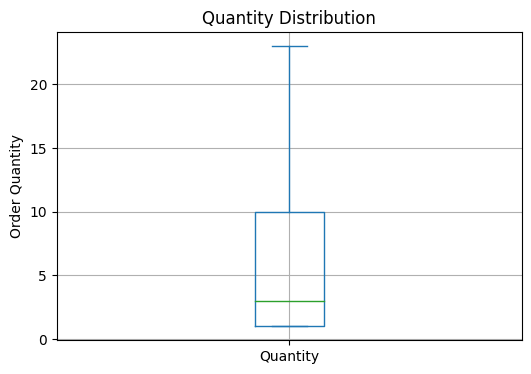

In [14]:
ax = df['Quantity'].plot.box(        #Creating a box plot for the 'Quantity' column
    showfliers=False,                #showfliers=False means that outliers will not be displayed in the box plot
    grid=True,                       #grid=True adds a grid to the plot for better readability
    figsize=(6, 4)                   #figsize=(6, 4) sets the size of the figure to 6 inches wide and 4 inches tall
)

ax.set_ylabel('Order Quantity')          #Setting the y-axis label for the box plot
ax.set_title('Quantity Distribution')    #Setting the title of the box plot

plt.suptitle("") 
plt.show()

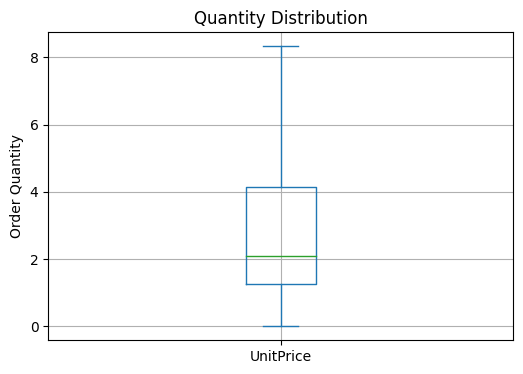

In [15]:
ax = df['UnitPrice'].plot.box(    #Creating a box plot for the 'Quantity' column
    showfliers=False,             #showfliers=False means that outliers will not be displayed in the box plot
    grid=True,                    #grid=True adds a grid to the plot for better readability
    figsize=(6, 4)                #figsize=(6, 4) sets the size of the figure to 6 inches wide and 4 inches tall
) 

ax.set_ylabel('Order Quantity')          #Setting the y-axis label for the box plot
ax.set_title('Quantity Distribution')    #Setting the title of the box plot

plt.suptitle("")
plt.show()

In [16]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()   ## Resampling the DataFrame to count the number of unique 'InvoiceNo' (orders) for each month
# 'M' indicates that we want to group the data by month
# nunique() counts the number of unique values in the 'InvoiceNo' column for each month

In [17]:
monthly_orders_df    #monthly orders according to year and month

InvoiceDate
2010-12-31    1559
2011-01-31    1086
2011-02-28    1100
2011-03-31    1454
2011-04-30    1246
2011-05-31    1681
2011-06-30    1533
2011-07-31    1475
2011-08-31    1361
2011-09-30    1837
2011-10-31    2040
2011-11-30    2769
2011-12-31     819
Freq: M, Name: InvoiceNo, dtype: int64

In [18]:
#list comprehension

[ x**3 for x in [1,2,3,4,5,6] if x%2 == 0 ]

[8, 64, 216]

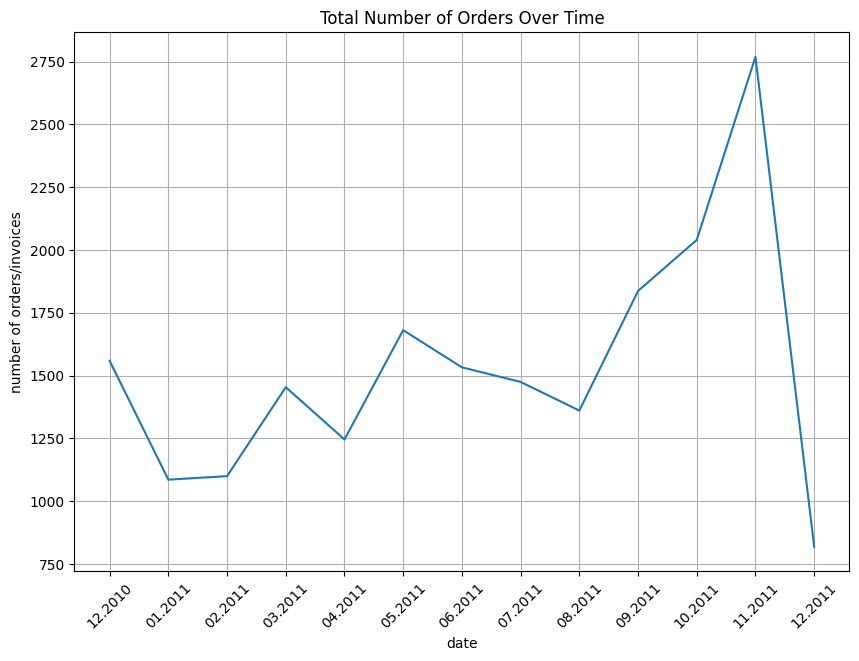

In [19]:
ax = pd.DataFrame(monthly_orders_df.values).plot(    #Creating a DataFrame from the values of monthly_orders_df
    grid=True,                                       #grid=True adds a grid to the plot for better readability
    figsize=(10,7),                                  #figsize=(10, 7) sets the size of the figure to 10 inches wide and 7 inches tall
    legend=False                                     #legend=False hides the legend since we are plotting a single series
)

ax.set_xlabel('date')                               #Setting the x-axis label
ax.set_ylabel('number of orders/invoices')          #Setting the y-axis label
ax.set_title('Total Number of Orders Over Time')    #Setting the title of the plot

plt.xticks(                                                  #Customizing the x-ticks to show formatted dates
    range(len(monthly_orders_df.index)),                     #range(len(monthly_orders_df.index)) generates a range object for the x-tick positions
    [x.strftime('%m.%Y') for x in monthly_orders_df.index],  #[x.strftime('%m.%Y') for x in monthly_orders_df.index] formats the dates to 'MM.YYYY'
    rotation=45                                              #Rotating the x-tick labels by 45 degrees for better visibility
)

plt.show()

In [20]:
invoice_dates = df.loc[ df['InvoiceDate'] >= '2011-12-01','InvoiceDate']    #Filtering the DataFrame to get InvoiceDate values on or after December 1, 2011
# The loc method is used to access a group of rows and columns by labels or a boolean array
# df['InvoiceDate'] >= '2011-12-01' creates a boolean mask that is True for dates on or after the specified date

In [21]:
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))    #Printing min amd max date

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [22]:
df.loc[df['InvoiceDate'] < '2011-12-01'].shape   #Assessing how many entries in the DataFrame have an invoice date before the specified date

(504993, 8)

In [23]:
df.shape   #printing the shape of the dataframe

(530104, 8)

In [24]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']   #Assessing how many entries in the DataFrame have an invoice date before the specified date

In [25]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()   #Resampling the DataFrame to count the number of unique 'InvoiceNo' (orders) for each month

In [26]:
monthly_orders_df    #monthly orders according to year and month

InvoiceDate
2010-12-31    1559
2011-01-31    1086
2011-02-28    1100
2011-03-31    1454
2011-04-30    1246
2011-05-31    1681
2011-06-30    1533
2011-07-31    1475
2011-08-31    1361
2011-09-30    1837
2011-10-31    2040
2011-11-30    2769
Freq: M, Name: InvoiceNo, dtype: int64

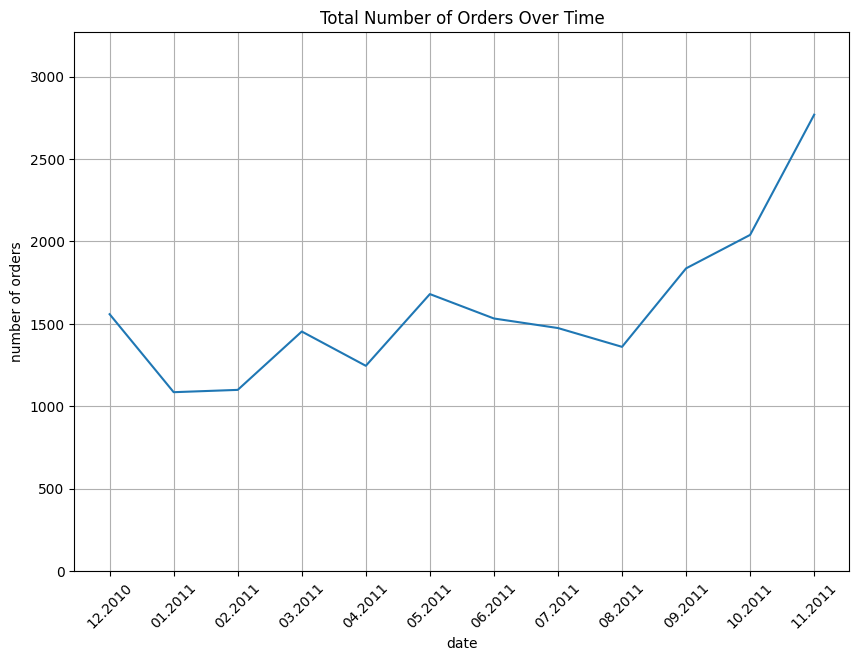

In [27]:
ax = pd.DataFrame(monthly_orders_df.values).plot(   #Creating a DataFrame from the values of monthly_orders_df
    grid=True,                                      #grid=True adds a grid to the plot for better readability
    figsize=(10,7),                                 #figsize=(10, 7) sets the size of the figure to 10 inches wide and 7 inches tall
    legend=False                                    #legend=False hides the legend since we are plotting a single series
)

ax.set_xlabel('date')                               #Setting the x-axis label
ax.set_ylabel('number of orders')                   #Setting the y-axis label
ax.set_title('Total Number of Orders Over Time')    #Setting the title of the plot

ax.set_ylim([0, max(monthly_orders_df.values)+500]) #Setting the y-axis limits to provide some padding above the maximum value

plt.xticks(                                                    #Customizing the x-ticks to show formatted dates
    range(len(monthly_orders_df.index)),                       #range(len(monthly_orders_df.index)) generates a range object for the x-tick positions
    [x.strftime('%m.%Y') for x in monthly_orders_df.index],    #[x.strftime('%m.%Y') for x in monthly_orders_df.index] formats the dates to 'MM.YYYY'
    rotation=45                                                #Rotating the x-tick labels by 45 degrees for better visibility
)

plt.show()

In [28]:
invoice_dates = df.loc[df['InvoiceDate'] <= '2010-12-31', 'InvoiceDate']    #Filtering the DataFrame to get InvoiceDate values before December 31, 2010

In [29]:
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))    #Printing min amd max date

Min date: 2010-12-01 08:26:00
Max date: 2010-12-23 17:41:00


In [30]:
df['Sales'] = df['Quantity'] * df['UnitPrice']   #Calculating the Sales for each transaction

In [31]:
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()   #Resampling the DataFrame to calculate the total revenue for each month

In [32]:
monthly_revenue_df    #monthly revenue according to year and month

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     759138.380
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

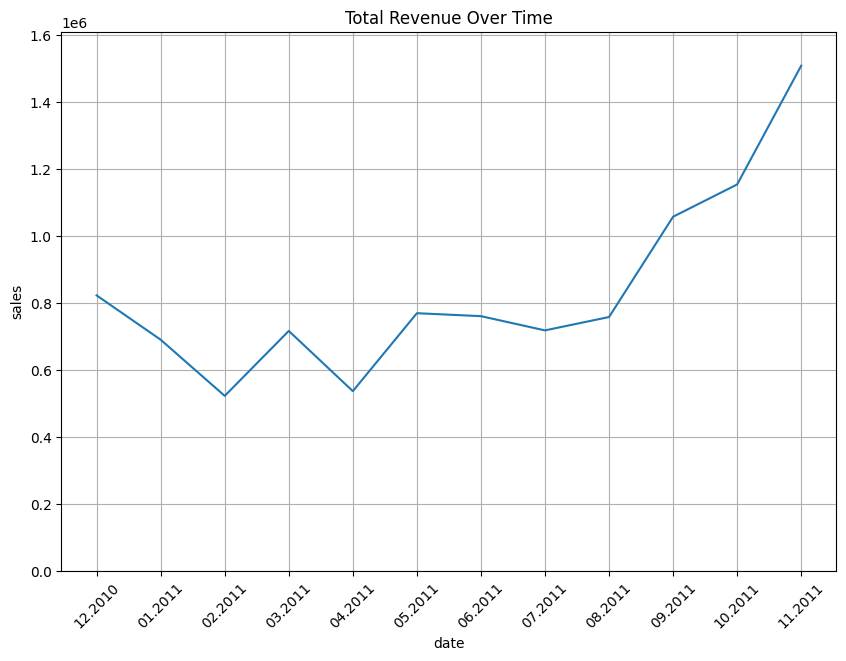

In [33]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(         #Creating a DataFrame from the values of monthly_revenue_df
    grid=True,                                             ##grid=True adds a grid to the plot for better readability
    figsize=(10,7),                                        #figsize=(10, 7) sets the size of the figure to 10 inches wide and 7 inches tall
    legend=False                                           #legend=False hides the legend since we are plotting a single series
)

ax.set_xlabel('date')                                      ##Setting the x-axis label
ax.set_ylabel('sales')                                     ##Setting the y-axis label
ax.set_title('Total Revenue Over Time')                    #Setting the title of the plot 

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])    #Setting the y-axis limits to provide some padding above the maximum value

plt.xticks(                                                   #Customizing the x-ticks to show formatted dates
    range(len(monthly_revenue_df.index)),                     #range(len(monthly_revenue_df.index)) generates a range object for the x-tick positions
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index],  #[x.strftime('%m.%Y') for x in monthly_revenue_df.index] formats the dates to 'MM.YYYY'
    rotation=45                                               #Rotating the x-tick labels by 45 degrees for better visibility
)

plt.show()

In [34]:
df.head()       #Displaying the first 5 rows of the Dataframe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [35]:
invoice_customer_df = df.groupby(           #Grouping the DataFrame by 'InvoiceNo' and 'InvoiceDate
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,                           #Summing the 'Sales' for each invoice
    'CustomerID': max,                      #Getting the maximum 'CustomerID' for each invoice (assuming one customer per invoice)
    'Country': max,                         #Getting the maximum 'Country' for each invoice (assuming one country per invoice)
}).reset_index()                            #Resetting the index to convert the grouped DataFrame back to a regular DataFrame

In [36]:
invoice_customer_df.head()                 #Displaying the first few rows of the invoice_customer_df DataFrame

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


In [37]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([    #Setting the 'InvoiceDate' column as the index of the DataFrame
    pd.Grouper(freq='M'), 'CustomerID'                                                  #Grouping by month and CustomerID within each month
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']                   #Filtering groups to keep only those with more than one entry (repeat customers)

In [38]:
monthly_repeat_customers_df    #Displaying the resulting DataFrame with monthly repeat customers

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    152
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [39]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()   #Resampling the DataFrame to count the number of unique 'CustomerID' for each month

In [40]:
monthly_unique_customers_df     #Displaying the resulting DataFrame with monthly unique customers

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1664
Freq: M, Name: CustomerID, dtype: int64

In [41]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0    #Calculating the monthly repeat percentage
monthly_repeat_percentage                                                                    #Displaying the resulting DataFrame with monthly repeat percentages

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.052770
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.512019
Freq: M, Name: CustomerID, dtype: float64

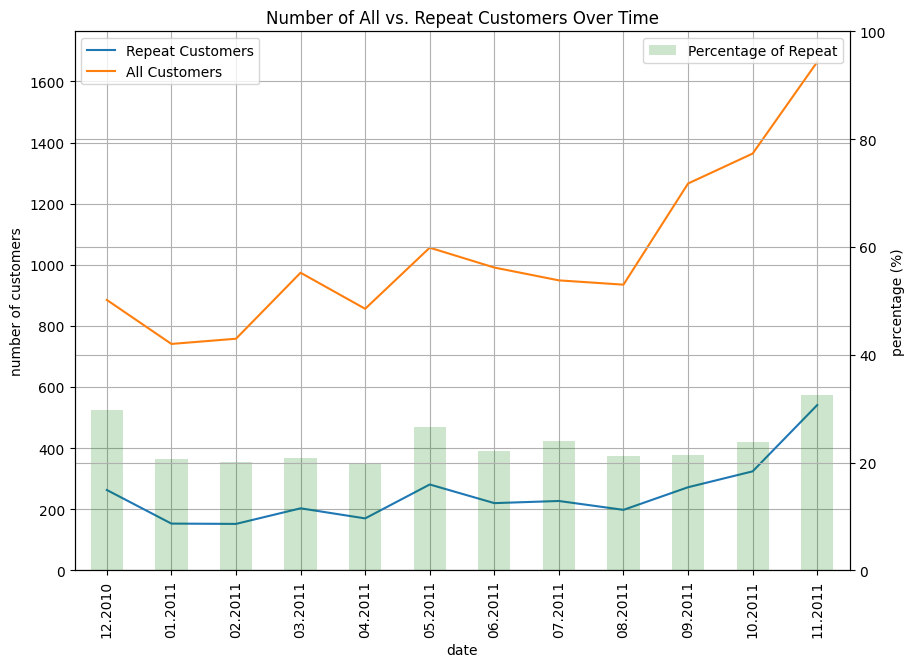

In [42]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(          #Creating a line plot for the number of repeat customers
    figsize=(10,7)                                                   #Setting the size of the figure to 10 inches wide and 7 inches tall
)

pd.DataFrame(monthly_unique_customers_df.values).plot(               #Creating a line plot for the number of unique customers
    ax=ax,                                                           #Using the same axes as the previous plot
    grid=True                                                        #Add a grid to the plot for better readability
)


ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(       #Creating a bar plot for the percentage of repeat customers on a secondary y-axis
    ax=ax,                                                           #Using the same axes as the previous plots
    grid=True,                                                       #Adding a grid to the bar plot for better readability
    secondary_y=True,                                                #Creating a secondary y-axis for the percentage
    color='green',                                                   #Setting the color of the bars to green
    alpha=0.2                                                        #Setting the transparency of the bars
)
 
ax.set_xlabel('date')                                                #Setting the x-axis label
ax.set_ylabel('number of customers')                                 #Setting the y-axis label for the primary y-axis (number of customers)
ax.set_title('Number of All vs. Repeat Customers Over Time')         #Setting the title of the plot

ax2.set_ylabel('percentage (%)')                                     #Setting the y-axis label for the secondary y-axis (percentage)

ax.legend(['Repeat Customers', 'All Customers'])                     #Legend for the primary y-axis
ax2.legend(['Percentage of Repeat'], loc='upper right')              #Legend for the secondary y-axis

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])       #Adding some padding above the max value
ax2.set_ylim([0, 100])                                               #Percentage should range from 0 to 100

plt.xticks(                                                            #Customizing the x-ticks to show formatted dates
    range(len(monthly_repeat_customers_df.index)),                     #range(len(monthly_repeat_customers_df.index)) generates a range object for the x-tick positions
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index],  #Format dates to 'MM.YYYY'
    rotation=45                                                        #Rotating the x-tick labels by 45 degrees for better visibility
)

plt.show()

In [43]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([    #Setting the 'InvoiceDate' column as the index of the DataFrame
    pd.Grouper(freq='M'), 'CustomerID'                                                      #Grouping by month using a time-based grouper
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']                                #Filtering groups to keep only those with more than one entry (repeat customers)

C:\Users\hp\AppData\Local\Temp\ipykernel_8440\505950284.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([    #Setting the 'InvoiceDate' column as the index of the DataFrame


In [44]:
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0   #Calculating the percentage of revenue from repeat customers relative to total monthly revenue

In [45]:
monthly_rev_perc_repeat_customers_df      #Displaying the resulting DataFrame with the percentage of revenue from repeat customers

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.488853
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    41.775552
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
Freq: M, Name: Sales, dtype: float64

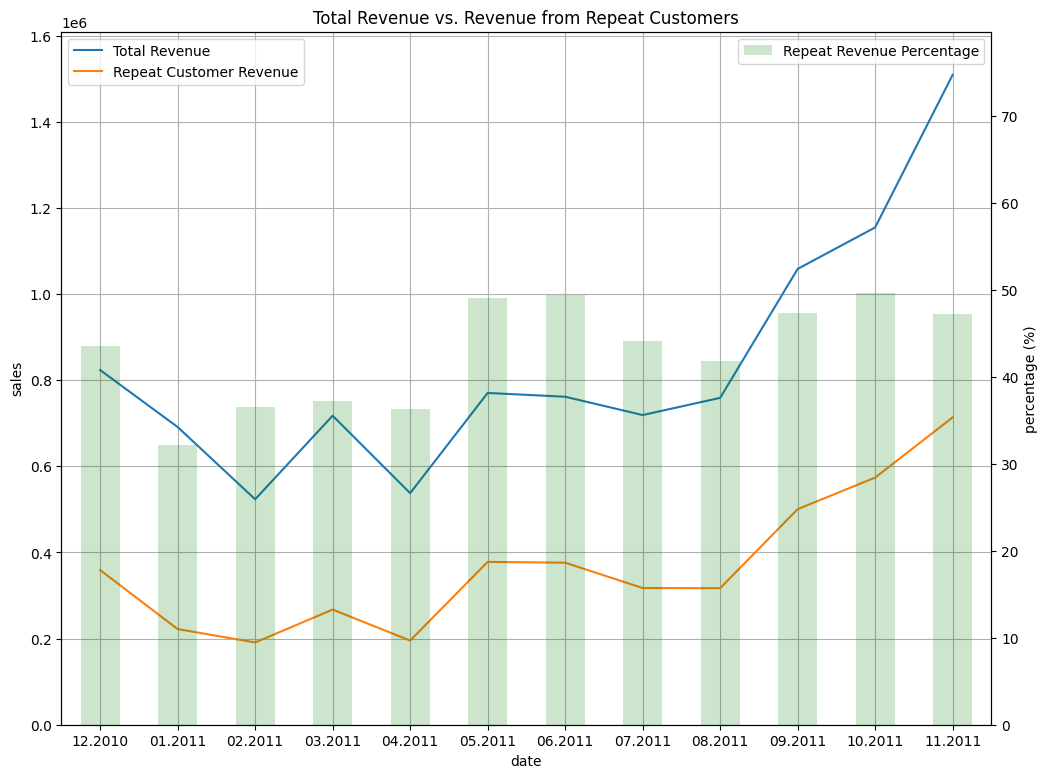

In [46]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))      #Setting the figure size to 12x9 inches

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(             #Overlaying the line plot for revenue from repeat customers on the same axes
    ax=ax,                                                             #Using the same axes as the previous plot
    grid=True,                                                         #Adding a grid to the plot for better readability
)

ax.set_xlabel('date')                                                  #Setting the x-axis label
ax.set_ylabel('sales')                                                 #Setting the y-axis label
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')        #Setting the title of the plot

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])                #Adding a legend to differentiate between total revenue and repeat customer revenue

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])                #Setting the limits for the y-axis to provide some padding above the maximum value

ax2 = ax.twinx()                                                       #Creating a secondary y-axis for the percentage of repeat customer revenue

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(        #Creating a bar plot for the percentage of revenue from repeat customers on the secondary y-axis
    ax=ax2,                                                            #Using the secondary axes
    kind='bar',                                                        #Specifying that we want a bar plot
    color='g',                                                         #Setting the transparency of the bars
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])  #Setting the limits for the secondary y-axis
ax2.set_ylabel('percentage (%)')                                        #Setting the y-axis label for the secondary y-axis
ax2.legend(['Repeat Revenue Percentage'])                               #Adding a legend for the secondary y-axis

ax2.set_xticklabels([                                                            #Customizing the x-tick labels to show formatted dates
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index      #Formating dates to 'MM.YYYY'
])

plt.show()

In [47]:
#40% is the average or the one value that describes repeat revenue percentage

In [48]:
pd.isnull(df['CustomerID']).sum()     #Summing the boolean Series to count the number of null values

124413

In [49]:
df.shape                              #Printing the shape of the dataframe

(504993, 9)

In [50]:
df = df[pd.notnull(df['CustomerID'])]     #The expression df[pd.notnull(df['CustomerID'])] creates a new DataFrame that includes only the rows where the 'CustomerID' is not null (i.e., valid customer IDs)

In [51]:
df.shape                             #Printing the shape of the dataframe

(380580, 9)

In [52]:
df.head()                            #Displaying the first 5 rows of the Dataframe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [53]:
customer_df = df.groupby('CustomerID').agg({         #Grouping the DataFrame 'df' by 'CustomerID'
    'Sales': sum,                                    #Calculating the total sales for each customer
    'InvoiceNo': lambda x: x.nunique()               #Counting the number of unique invoices for each customer
})

customer_df.columns = ['TotalSales', 'OrderCount']                                     #Renaming 'Sales' to 'TotalSales' and 'InvoiceNo' to 'OrderCount'
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']     #Calculating the average order value for each customer

In [54]:
customer_df.head()          #Displaying the first 5 rows of the Dataframe

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


In [55]:
customer_df.describe()       #Description of numerical features in the dataset

,TotalSales,OrderCount,AvgOrderValue
count,4297.000000,4297.000000,4297.000000
mean,1953.273240,4.131720,400.371478
std,8355.832473,7.412705,1271.352605
min,2.900000,1.000000,2.900000
25%,304.470000,1.000000,178.700000
50%,657.300000,2.000000,295.056667
75%,1600.860000,4.000000,431.674000
max,268478.000000,200.000000,77183.600000


In [56]:
rank_df = customer_df.rank(method='first')    #Ranking the customers based on their TotalSales, OrderCount, and AvgOrderValue

In [57]:
rank_df.describe()                             #Description of numerical features in the dataset

,TotalSales,OrderCount,AvgOrderValue
count,4297.000000,4297.000000,4297.000000
mean,2149.000000,2149.000000,2149.000000
std,1240.581383,1240.581383,1240.581383
min,1.000000,1.000000,1.000000
25%,1075.000000,1075.000000,1075.000000
50%,2149.000000,2149.000000,2149.000000
75%,3223.000000,3223.000000,3223.000000
max,4297.000000,4297.000000,4297.000000


In [58]:
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()     #Dividing the centered values by the standard deviation of each column

In [59]:
normalized_df.head()                                           #Displaying the first 5 rows of the Dataframe

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724998,-1.731446,1.731446
12347.0,1.457381,1.064017,1.400956
12348.0,0.967288,0.573118,0.929403
12349.0,0.943912,-1.730640,1.683082
12350.0,-0.732721,-1.729834,0.331296


In [60]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])   #Applying K-Means clustering to the normalized customer data, we are clustering based on three features: TotalSales, OrderCount, and AvgOrderValue

c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [61]:
kmeans     #Number of clusters

KMeans(n_clusters=4)

In [62]:
kmeans.labels_     #Accessing the cluster labels assigned to each data point

array([3, 0, 0, ..., 1, 2, 0])

In [63]:
kmeans.cluster_centers_      #Accessing the cluster centers from the fitted KMeans model

array([[ 1.20556021,  1.00207282,  0.87598642],
       [-1.23112559, -0.78174466, -1.05227259],
       [ 0.24753641,  0.74437185, -0.64131205],
       [-0.1318184 , -0.84745213,  0.79684357]])

In [64]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)    #Creating a new DataFrame to store the normalized features along with the assigned cluster labels
four_cluster_df['Cluster'] = kmeans.labels_                                                       #Adding a new column 'Cluster' to the DataFrame, which contains the cluster labels assigned by the KMeans model

In [65]:
four_cluster_df.head()     #Displaying the first 5 rows of the Dataframe

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724998,-1.731446,1.731446,3
12347.0,1.457381,1.064017,1.400956,0
12348.0,0.967288,0.573118,0.929403,0
12349.0,0.943912,-1.730640,1.683082,3
12350.0,-0.732721,-1.729834,0.331296,3


In [66]:
four_cluster_df.groupby('Cluster').count()['TotalSales']   #Using the count() method to count the number of non-null entries in the 'TotalSales' column for each cluster

Cluster
0    1126
1    1174
2     932
3    1065
Name: TotalSales, dtype: int64

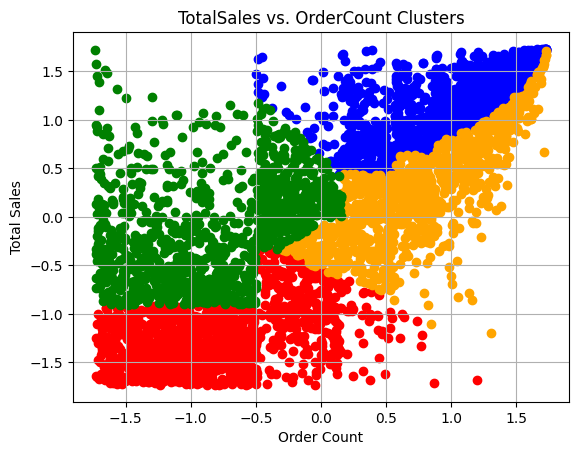

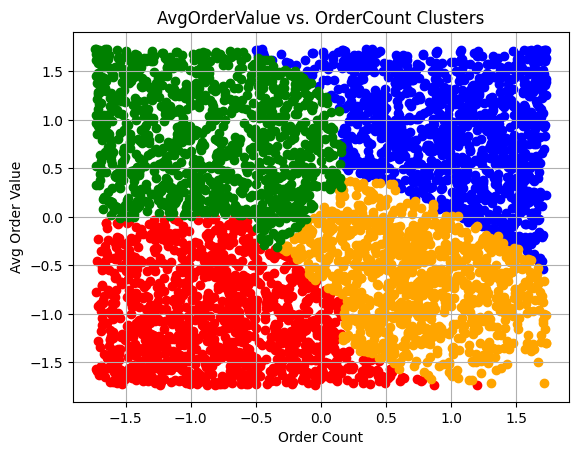

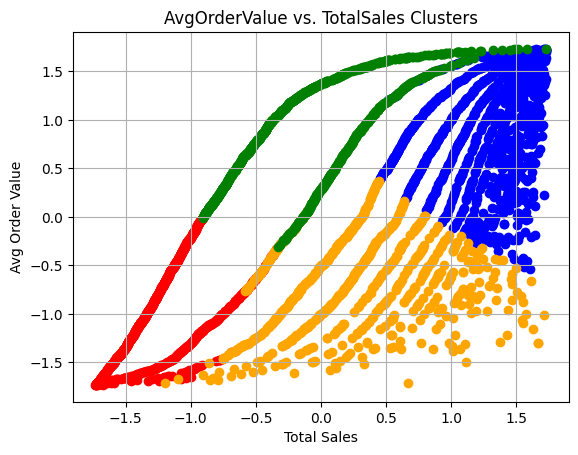

In [67]:
#Scatter plot for TotalSales vs. OrderCount
plt.scatter(                                                               
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],    
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],    
    c='blue'            #Cluster 0
)

plt.scatter(                                                               
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'     #Cluster 1
)

plt.scatter(                                                               #
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'    #Cluster 2
)   

plt.scatter(                                                               #
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'     #Cluster 3
)

plt.title('TotalSales vs. OrderCount Clusters')     #Setting the title for the first plot
plt.xlabel('Order Count')                           #Setting the x-label for the first plot
plt.ylabel('Total Sales')                           #Setting the y-label for the first plot

plt.grid()
plt.show()

#Scatter plot for AvgOrderValue vs. OrderCount
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'    #Cluster 0
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'    #Cluster 1
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'  #Cluster 2
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'    #Cluster 3
)

plt.title('AvgOrderValue vs. OrderCount Clusters')     #Setting the title for the second plot
plt.xlabel('Order Count')                              #Setting the x-label for the second plot
plt.ylabel('Avg Order Value')                          #Setting the y-label for the second plot

plt.grid()
plt.show()

#Scatter plot for AvgOrderValue vs. TotalSales
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'    #Cluster 0
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'     #Cluster 1
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'  #Cluster 2
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'   #Cluster 3
) 

plt.title('AvgOrderValue vs. TotalSales Clusters')      #Setting the title for the third plot
plt.xlabel('Total Sales')                               #Setting the x-label for the third plot
plt.ylabel('Avg Order Value')                           #Setting the y-label for the third plot

plt.grid()
plt.show()